In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import functions as fn

In [2]:
plt.style.use(str(fn.HERE_PATH/'plot.mplstyle'))

In [3]:
z = 2
x_bins = np.logspace(-2, 0, 21)
k = np.logspace(-1, 2, 30)
is_normalize = False

In [4]:
x = np.sqrt(x_bins[:-1]*x_bins[1:])
power_path = fn.HERE_PATH/'Power_Spectra'
fig_path = fn.HERE_PATH/'Power_Spectrum_Plots'

In [5]:
df_lin = pd.read_csv(power_path/f'lin_z{z}.csv')
k_lin = np.array(df_lin.iloc[:,0])
P_lin = np.array(df_lin.iloc[:,1])

df_non = pd.read_csv(power_path/f'nonlin_z{z}.csv')
k_non = np.array(df_non.iloc[:,0])
P_non = np.array(df_non.iloc[:,1])

df_tot = pd.read_csv(power_path/f'box_total_z{z}.csv')
k_tot = np.array(df_tot.iloc[:,0])
P_tot = np.array(df_tot.iloc[:,1])

df_box = pd.read_csv(power_path/f'box_z{z}.csv')
P_box = np.array(df_box.iloc[:,1])

df_zooms = pd.read_csv(power_path/f'zoom_z{z}.csv')
P_zooms = np.array(df_zooms.iloc[:,1])

/tmp/ipykernel_281437/804612446.py:16: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_281437/804612446.py:16: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_281437/804612446.py:16: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


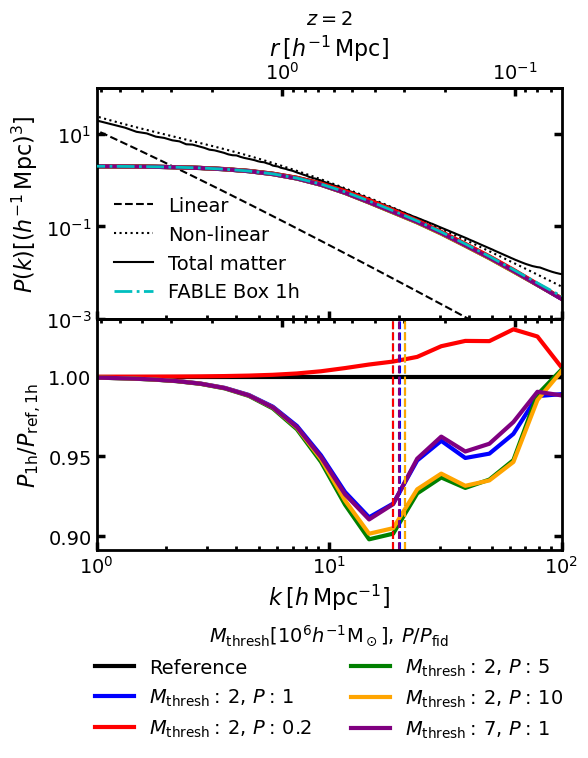

In [11]:
fg, ax = plt.subplots(2, gridspec_kw={'height_ratios':[1,1]})
fg.subplots_adjust(hspace=0)
ax[0].loglog()
ax[1].semilogx()
ax[1].set_xlabel(r'$k\: [h \,\mathrm{Mpc}^{-1}]$')
ax[0].set_ylabel(r'$P(k) [(h^{-1}\,\mathrm{Mpc})^{3}]$')
ax[1].set_ylabel(r'$P_\mathrm{1h} / P_\mathrm{ref, 1h}$', size=16)
ax[0].set_xlim([1e0, k[-1]])
ax[1].set_xlim([1e0, k[-1]])
ax[0].set_ylim([1e-3, 1e2])
ax[0].set_xticklabels([])
ax[0].tick_params(which='both', top=False)
ax[1].tick_params(which='both', top=False)


f = lambda x: 2*np.pi/x

ax2 = ax[0].secondary_xaxis('top', functions=(f,f))
ax2.set_xlabel(r'$r\:[h^{-1}\,\mathrm{Mpc}]$')

ax3 = ax[1].secondary_xaxis('top', functions=(f,f))
ax3.set_xticklabels([])
if is_normalize:
    title = 'Normalized'
else:
    title = ''

ax[0].set_title(f'$z = {z}$')

lines1 = np.array([])
lines2 = np.array([])

lines1 = np.append(lines1, ax[0].plot(k_lin, P_lin, '--', c='k', label='Linear'))
lines1 = np.append(lines1, ax[0].plot(k_non, P_non, ':', c='k', label='Non-linear'))
lines1 = np.append(lines1, ax[0].plot(k_tot, P_tot, c='k', label='Total matter'))
lines1 = np.append(lines1, ax[0].plot(k, P_box, '-.', lw=2, c='c', label='FABLE Box 1h', zorder=10))
#lines1 = np.append(lines1, ax[0].plot(k, P_zooms, '-.', lw=2, c='tab:pink', label='Zoom-ins 1h', zorder=10))

if is_normalize:
    file_name = 'norm'
else:
    file_name = 'unnorm'

for model in fn.MODELS:
    df_model = pd.read_csv(power_path/f'{model}_{file_name}_z{z}.csv')
    P_mod = np.array(df_model.iloc[:,1])

    if model == 'REF':
        P_ref = P_mod
        
    ax[0].plot(k, P_mod, lw=3, c=fn.COLORS[model])
    ax[1].plot(k, P_mod/P_ref, lw=3, c=fn.COLORS[model], label=fn.LABELS[model])
    #ylim = ax[1].get_ylim()
    
, zorder=10
ylim = ax[1].get_ylim()

for model in fn.MODELS:
    df_mod = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'{model}_z{z}.csv')
    r_200 = np.array(df_mod.iloc[:,-1])

    ax[1].vlines(2*np.pi/r_200, ylim[0], ylim[1], colors = fn.COLORS[model], linestyles='dashed')

ax[1].set_ylim(ylim)
ax[0].legend(loc='lower left', ncols=1)
ax[1].legend(bbox_to_anchor=(0.5, -0.9), loc='lower center', title=fn.LEGEND_TITLE, ncols=2)   
fg.show()
fg.savefig(fig_path/f'1h_z{z}.pdf', bbox_inches='tight')
fg.savefig(fn.HERE_PATH/'Project_Plots'/f'1h_z{z}.pdf', bbox_inches='tight')

In [7]:
!conda list 'matplotlib'

# packages in environment at /data/ERCblackholes4/eac83/envirs/envs/ewanv:
#
# Name                    Version                   Build  Channel
matplotlib                3.7.1           py311h06a4308_1  
matplotlib-base           3.7.1           py311ha02d727_1  
matplotlib-inline         0.1.6           py311h06a4308_0  
